In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/smoker-status-prediction/train_dataset.csv
/kaggle/input/smoker-status-prediction/test_dataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/smoker-status-prediction/train_dataset.csv")

print(data.head)

<bound method NDFrame.head of        age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       35         170          85       97.0             0.9   
1       20         175         110      110.0             0.7   
2       45         155          65       86.0             0.9   
3       45         165          80       94.0             0.8   
4       20         165          60       81.0             1.5   
...    ...         ...         ...        ...             ...   
38979   40         165          60       80.0             0.4   
38980   45         155          55       75.0             1.5   
38981   40         170         105      124.0             0.6   
38982   40         160          55       75.0             1.5   
38983   55         175          60       81.1             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  0.9              1               1       118          78   
1                  0.9         

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:
print(data.corr())

                          age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.480666   -0.325445  -0.027419   
height(cm)          -0.480666    1.000000    0.673710   0.377978   
weight(kg)          -0.325445    0.673710    1.000000   0.824865   
waist(cm)           -0.027419    0.377978    0.824865   1.000000   
eyesight(left)      -0.186048    0.146796    0.104331   0.028536   
eyesight(right)     -0.191045    0.157524    0.114800   0.040844   
hearing(left)        0.201258   -0.081996   -0.052348   0.020999   
hearing(right)       0.206989   -0.080124   -0.054221   0.018157   
systolic             0.133009    0.081973    0.270197   0.321100   
relaxation           0.048424    0.113592    0.274634   0.294253   
fasting blood sugar  0.182210    0.016390    0.136793   0.212618   
Cholesterol          0.056913   -0.080821    0.026066   0.064939   
triglyceride         0.013610    0.158069    0.325119   0.360264   
HDL                  0.008923   -0.216711   -0.3

hemoglobin memiliki korelasi paling besar dengan variabel smoking

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()

X_train = data[['hemoglobin']]
y_train = data['smoking']
model = model.fit(X_train, y_train)

Namun setelah memfilter data berat badan yang lebih dari 80 kg ada korelasi besar terkait apakah orang tersebut perokok atau tidak, sehinga kita akan fokus ke variabel berat badan. 

In [25]:
test_data = pd.read_csv('/kaggle/input/smoker-status-prediction/test_dataset.csv')

X_test = test_data[['hemoglobin']]
model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [26]:
model.predict_proba(X_test)

array([[0.47800587, 0.52199413],
       [0.47800587, 0.52199413],
       [0.87448276, 0.12551724],
       ...,
       [0.88517442, 0.11482558],
       [0.67947179, 0.32052821],
       [0.42735949, 0.57264051]])

[Text(0.5228291495901639, 0.9722222222222222, 'x[0] <= 14.45\ngini = 0.465\nsamples = 38984\nvalue = [24666, 14318]'),
 Text(0.3940189549180328, 0.9166666666666666, 'x[0] <= 13.85\ngini = 0.249\nsamples = 16384\nvalue = [13991, 2393]'),
 Text(0.3208247950819672, 0.8611111111111112, 'x[0] <= 13.25\ngini = 0.162\nsamples = 11615\nvalue = [10585, 1030]'),
 Text(0.23591188524590165, 0.8055555555555556, 'x[0] <= 12.85\ngini = 0.119\nsamples = 7318\nvalue = [6855, 463]'),
 Text(0.12756147540983606, 0.75, 'x[0] <= 9.95\ngini = 0.101\nsamples = 4823\nvalue = [4566, 257]'),
 Text(0.01639344262295082, 0.6944444444444444, 'x[0] <= 8.25\ngini = 0.042\nsamples = 375\nvalue = [367, 8]'),
 Text(0.00819672131147541, 0.6388888888888888, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(0.02459016393442623, 0.6388888888888888, 'x[0] <= 8.35\ngini = 0.055\nsamples = 284\nvalue = [276, 8]'),
 Text(0.01639344262295082, 0.5833333333333334, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.032786885245

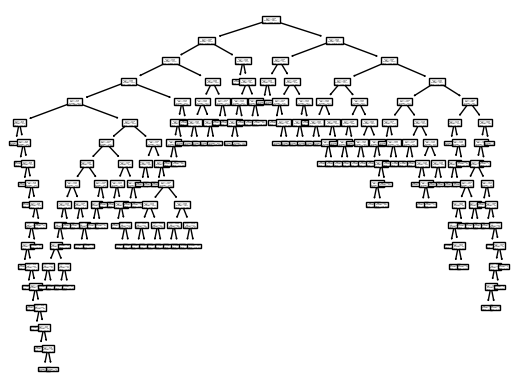

In [31]:
plot_tree(model)